# Report It! Newport Data Analysis
This notebook runs through some basic analysis of [Report It! Newport](https://engagenewport.com/report-a-problem) data, which uses the  [SeeClickFix](http://www.seeclickfix.com) app.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Clone the seeclickfix archive from [here](https://github.com/NewportDataPortal/seeclickfix-archive)

In [2]:
datafile = '../../Datasets/seeclickfix-archive/newport_2_issues_archive.json'
issues = pd.read_json(datafile, orient="records")

## Types of Issues

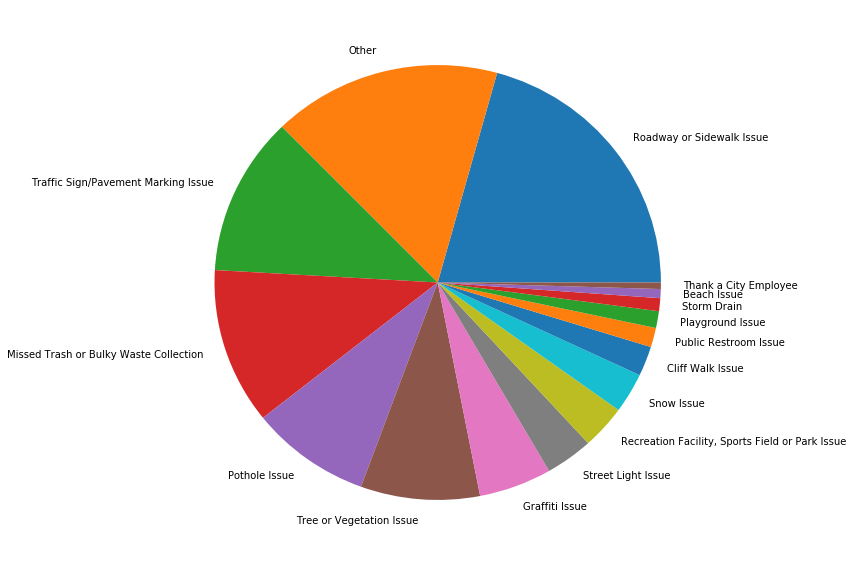

In [3]:
# pie chart of issue types
pie_data = issues['request_type.title'].value_counts()
total = pie_data.sum()
labels = list(pie_data.index)
fig1, ax1 = plt.subplots(figsize=[10,10])
ax1.pie(pie_data.values,labels=labels)
plt.show()

In [4]:
# the raw counts
pie_data

Roadway or Sidewalk Issue                          216
Other                                              173
Traffic Sign/Pavement Marking Issue                123
Missed Trash or Bulky Waste Collection             121
Pothole Issue                                       91
Tree or Vegetation Issue                            90
Graffiti Issue                                      55
Street Light Issue                                  36
Recreation Facility, Sports Field or Park Issue     34
Snow Issue                                          31
Cliff Walk Issue                                    23
Public Restroom Issue                               15
Playground Issue                                    13
Storm Drain                                         10
Beach Issue                                          7
Thank a City Employee                                5
Name: request_type.title, dtype: int64

## Issue Locations

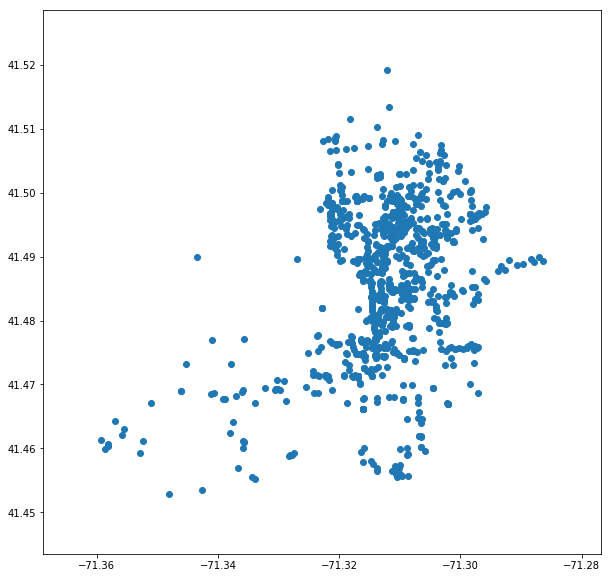

In [5]:
fig2, ax2 = plt.subplots(figsize=[10,10])
ax2.scatter(list(issues['lng']),list(issues['lat']))
plt.show()

## Who's reporting?
Here's how many unique reporting ids there are:

In [6]:
print(len(issues['reporter.id'].unique()))

207


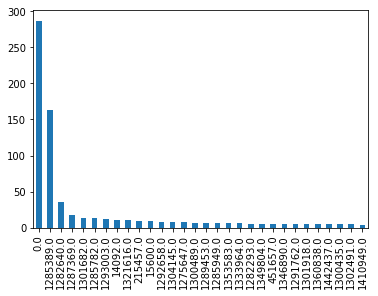

In [7]:
# plot the 30 most frequent reporters
issues['reporter.id'].value_counts().head(30).plot.bar()
plt.show()

It looks like the most frequent reporter is...

In [8]:
issues[issues['reporter.id']==0]['reporter.name'].iloc[0]

'An anonymous SeeClickFix user'

## Responses
What are the statisics for closing issues?

2230 days 11:49:39
78 days 06:23:58.474296
4 days 01:12:51


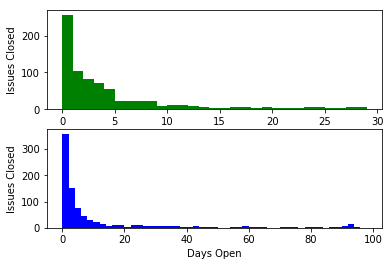

In [9]:
topen = issues.closed_at - issues.created_at
print(topen.max())
print(topen.mean())
print(topen.median())
fig, (ax1,ax2) = plt.subplots(2,1)
(topen/pd.Timedelta(days=1)).plot.hist(ax=ax1,bins=range(0,30,1),color="green")
ax1.set_xlabel("Days Open")
ax1.set_ylabel("Issues Closed")
(topen/pd.Timedelta(days=1)).plot.hist(ax=ax2,bins=range(0,100,2), color="blue")
ax2.set_xlabel("Days Open")
ax2.set_ylabel("Issues Closed")
plt.show()

In [10]:
now = pd.datetime.now()
still_open = issues[issues['closed_at'].isnull()]
hanging = now - still_open.created_at
print(hanging.mean())
print(hanging.median())

254 days 08:53:25.947078
157 days 00:16:32.919301
